In [77]:
import sys
sys.path.insert(0, './pretty-print-confusion-matrix/')
from confusion_matrix_pretty_print import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve

import warnings
warnings.simplefilter(action='ignore', category=[FutureWarning])

In [95]:
rawtest = pd.read_csv('./data/test.csv')
datatrain = pd.read_csv('cl_train.csv')
datatest = pd.read_csv('cl_test.csv')

In [79]:
X = datatrain.drop(columns=['Survived'])
Y = datatrain['Survived']
Xt = datatest

In [80]:
X.head()

,Age,Fare,Major,Jonkheer,Ms,the Countess,Mrs,Miss,Don,Mme,...,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,22.0,7.2500,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
1,38.0,71.2833,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,26.0,7.9250,0,0,0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,0
3,35.0,53.1000,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,35.0,8.0500,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0


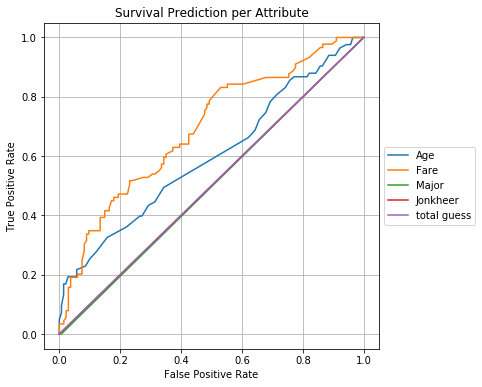

In [81]:
temp_acc = pd.Series()
for c in X.columns.tolist():
    tempX = np.array(X[c]).reshape(-1, 1)
    XTRAIN, XTEST, YTRAIN, YTEST = train_test_split(tempX, Y)
    my_model = LogisticRegression(solver='liblinear').fit(XTRAIN, YTRAIN)
    model_prediction = my_model.predict(XTEST)
    acc = accuracy_score(YTEST, model_prediction)
    if acc < 0.5799: break
    temp_acc[c] = acc
    SY = my_model.predict_proba(XTEST)[:,1] # second column = probability
    SFPR, STPR, STHRESH = roc_curve(YTEST, SY)
    plt.plot(SFPR, STPR, label=c)
    
plt.plot([0,1],[0,1], label='total guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Survival Prediction per Attribute")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.gcf().set_size_inches(6,6)

In [82]:
def show_grid_results(grid_search):
    print('Best parameters:\n {} \n'.format( grid_search.best_params_ ))
    cvres = grid_search.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(mean_score, params)

In [88]:
from sklearn.model_selection import GridSearchCV
param_grid = [
#     {'multi_class': ['ovr'], 'penalty': ['l2'], 'solver': ['newton-cg']},
    
    { 'solver':['liblinear'] },
    { 'solver':['newton-cg'], 'penalty':['l2', 'none'], 'multi_class':['ovr', 'multinomial', 'auto'] },
    
#     { 'solver':['lbfgs'], 'penalty':['l2', 'none'], 'multi_class':['ovr', 'multinomial', 'auto'] },
#     { 'solver':['saga'], 'penalty':['elasticnet'], 'l1_ratio':[1, 0.7], 'multi_class':['ovr', 'multinomial', 'auto'] }
#     { 'solver':['sag'], 'penalty':['l2'], 'max_iter':[100] }
]
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid_search.fit(X, Y)
show_grid_results(grid_search)4

Best parameters:
 {'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'} 

0.8215488215488216 {'solver': 'liblinear'}
0.8226711560044894 {'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
0.8204264870931538 {'multi_class': 'ovr', 'penalty': 'none', 'solver': 'newton-cg'}
0.8215488215488216 {'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
0.8204264870931538 {'multi_class': 'multinomial', 'penalty': 'none', 'solver': 'newton-cg'}
0.8226711560044894 {'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
0.8204264870931538 {'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}


In [19]:
# from sklearn.model_selection import GridSearchCV
# param_grid = [
#     { 'solver':['liblinear'] },
#     { 'solver':['newton-cg'], 'penalty':['l2', 'none'], 'multi_class':['ovr', 'multinomial', 'auto'] },
# #     { 'solver':['lbfgs'], 'penalty':['l2', 'none'], 'multi_class':['ovr', 'multinomial', 'auto'] },
# #     { 'solver':['saga'], 'penalty':['elasticnet'], 'l1_ratio':[1, 0.7], 'multi_class':['ovr', 'multinomial', 'auto'] }
# #     { 'solver':['sag'], 'penalty':['l2'], 'max_iter':[100] }
# ]
# model = LogisticRegression()
# grid_search = GridSearchCV(model, param_grid, cv=20, scoring='f1', return_train_score=False)
# grid_search.fit(X, Y)
# show_grid_results(grid_search)

In [20]:
best_model = grid_search.best_estimator_


<img src='https://cdn-images-1.medium.com/max/1200/1*uR09zTlPgIj5PvMYJZScVg.png' style='width:400px;'>

In [100]:
XTRAIN, XTEST, YTRAIN, YTEST = train_test_split(X, Y)
YP = best_model.predict(XTEST)
dfcm = pd.DataFrame(confusion_matrix(YTEST, YP), columns=["Survived", "Not"]).set_index( pd.Index(['Survived', 'Not']) )
dfcm

,Survived,Not
Survived,122,17
Not,22,62


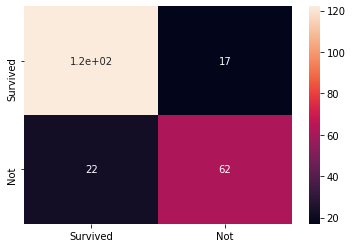

In [101]:
ax = sns.heatmap(dfcm, xticklabels=['Survived', 'Not'], yticklabels=['Survived', 'Not'], annot=True)

F1 SCORE:	 0.7607361963190185


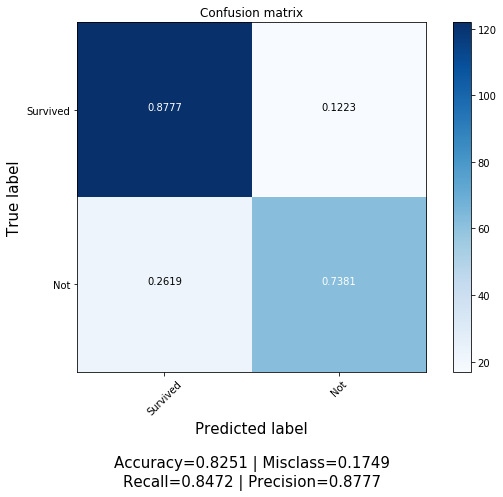

In [104]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    recall = cm[0,0] / np.sum(cm[:,0])
    precision = cm[0,0] / np.sum(cm[0,:])
#     f1score = (2*(precision*recall)) / (precision+recall)

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label\n\nAccuracy={:0.4f} | Misclass={:0.4f}\nRecall={:0.4f} | Precision={:0.4f}'.format(accuracy, misclass, recall, precision), fontsize=15)
    plt.show()
    
print('F1 SCORE:\t', f1_score(YTEST, YP))
plot_confusion_matrix(confusion_matrix(YTEST, YP), target_names=['Survived', 'Not'], normalize=True)

# Predict the test data

In [105]:
Yt = best_model.predict(Xt)

In [106]:
output = pd.concat([rawtest['PassengerId'], pd.Series(Yt)], axis=1)
output.columns=['PassengerId', 'Survived']
output.head()

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0


In [107]:
import datetime
x = datetime.datetime.now()
_result_file = './results/result_'+x.strftime("%b-%d %H %M %S")+'.csv'
output.to_csv(_result_file, index=False)

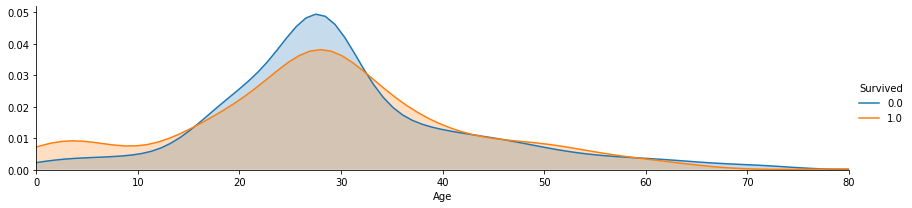

In [18]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( datatrain, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , datatrain['Age'].max()))
a.add_legend()